In [1]:
# ROC curve : 좌상단에 붙을수록 더 좋은 이진분류기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier     # k 근접 이웃
from sklearn.ensemble import RandomForestClassifier    # 앙상블_랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [27]:
# roc curve 함수 정의
def plot_roc_curve(fpr, tpr):        
    # fpt(Flase Positive Rate: 특이도) , tpr(True Positive Rate: 민감도)
    plt.plot(fpr, tpr, color = 'orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rete')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()   

In [4]:
# sample date 1000건 생성
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state = 1)

In [5]:
#임의로 생성된 데이터를 test, train 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [6]:
# random forest model 적용
model = RandomForestClassifier()
model.fit(train_X, train_y)

RandomForestClassifier()

In [10]:
# test data 셋으로 예측(확률 예측)
print(model.predict(test_X))     # 모델 예측 결과값

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [12]:
probs = model.predict_proba(test_X)   # 모델 예측 결과값이 나올 확률
print(probs)

[[0.99 0.01]
 [0.11 0.89]
 [0.97 0.03]
 [0.93 0.07]
 [0.06 0.94]
 [0.16 0.84]
 [0.18 0.82]
 [0.03 0.97]
 [0.12 0.88]
 [0.92 0.08]
 [0.21 0.79]
 [0.07 0.93]
 [0.93 0.07]
 [0.17 0.83]
 [0.21 0.79]
 [0.95 0.05]
 [0.06 0.94]
 [0.89 0.11]
 [0.08 0.92]
 [0.97 0.03]
 [0.94 0.06]
 [0.74 0.26]
 [0.15 0.85]
 [0.13 0.87]
 [0.21 0.79]
 [0.2  0.8 ]
 [0.94 0.06]
 [0.19 0.81]
 [0.2  0.8 ]
 [0.09 0.91]
 [0.97 0.03]
 [0.92 0.08]
 [0.25 0.75]
 [0.27 0.73]
 [0.21 0.79]
 [0.94 0.06]
 [0.96 0.04]
 [0.81 0.19]
 [0.07 0.93]
 [0.94 0.06]
 [0.98 0.02]
 [0.38 0.62]
 [0.98 0.02]
 [0.74 0.26]
 [0.22 0.78]
 [0.94 0.06]
 [0.18 0.82]
 [0.09 0.91]
 [0.15 0.85]
 [0.95 0.05]
 [0.99 0.01]
 [0.34 0.66]
 [0.98 0.02]
 [0.94 0.06]
 [0.93 0.07]
 [0.91 0.09]
 [0.16 0.84]
 [0.13 0.87]
 [0.83 0.17]
 [0.92 0.08]
 [0.51 0.49]
 [0.98 0.02]
 [0.05 0.95]
 [0.92 0.08]
 [0.92 0.08]
 [0.69 0.31]
 [0.96 0.04]
 [0.47 0.53]
 [0.06 0.94]
 [0.49 0.51]
 [0.05 0.95]
 [0.99 0.01]
 [0.12 0.88]
 [0.97 0.03]
 [0.93 0.07]
 [0.04 0.96]
 [0.97 0.03]

In [14]:
# 성능 평가

# positive class만 유지
probs = probs[:, 1]

In [18]:
# auc 구하기

roc_auc_score(test_y, probs)

0.9555847744696024

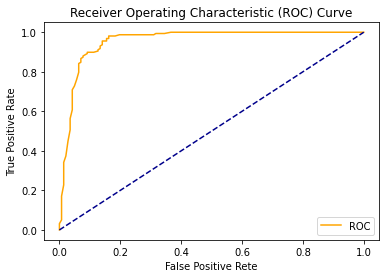

In [28]:
auc = roc_auc_score(test_y, probs)

# roc curve 곡선 그리기
fpr, tpr, thresholds = roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)